# Исследование объявлений о продаже квартир

Анализ рынка квартир Санкт-Петербурга и ближайших населеных пунктов.

1. [Изучение общей информации.](#step_1)
2. [Предобработка данных.](#step_2)
3. [Расчет показателей и добавление столбцов.](#step_3)
    * [Цена за квадратный метр.](#step_3_1)
    * [Этаж квартиры.](#step_3_2)
    * [Соотношение жилой и общей площади, отношение площади кухни к общей.](#step_3_3)
    * [Неделя, месяц и год размещения объявления.](#step_3_4)
4. [Исследовательский анализ данных и выполнение инструкций.](#step_4)
    * [Анализ площади, цены, числа комнат, высоты потолков.](#step_4_1)
    * [Время продажи квартиры.](#step_4_2)
    * [Редкие и выбивающиеся особености.](#step_4_3)
    * [Факторы влияющие на стоимость квартиры.](#step_4_4)
    * [Топ 10 населенных пунктов по количеству объявлений.](#step_4_5)
    * [Квартиры Санкт-Петербурга.](#step_4_6)
    * [Квартиры в центре Санкт-Петербурга.](#step_4_7)
5. [Общий вывод.](#step_5)

<a id="step_1"></a>
### Шаг 1. Изучение общей информации.

Рассмотрим имеющиеся данные и решим, что с ними делать.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('mode.chained_assignment', None)

data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Вывод

В таблице имеются пропущенные значения,как связанные с характеристиками комнаты, так и с географическим расположением объекта. Какие-то можно посдсчетать и подставить, а какие-то придется оставить пустыми.

<a id="step_2"></a>
### Шаг 2. Предобработка данных

Посмотрим, если ты дубликаты.

In [2]:
data.duplicated().sum()

0

Их нет, идём дальше.

Начнем с заполнения простых значений. Заполним пропуски `balcony` методом fillna, вероятно если не указано число балконов, то значение равно 0.

In [3]:
data['balcony'] = data['balcony'].fillna(0)

In [4]:
data['ceiling_height'] = (data['ceiling_height']
                            .fillna(data.groupby('floors_total')['ceiling_height']
                                        .transform('median')))
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Рассчетаем медиану для столбца `ceiling_height` и подставим её в место пропусков.

Посмотрим уникальные значения в столбце `is_apartment`.

In [5]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Как видем столбец `is_apartment` имеет 3 значения, и вероятно что те, кто не указал, что это апартаменты, не имеют такой тип, поэтому заполним пропуски значением False.

In [6]:
data['is_apartment'] = data['is_apartment'].fillna('False')

Подставим в столбцы `living_area` и `kitchen_area` на места пропусков 0, чтобы было удобнее заменить на медиану по группе.

In [7]:
data['living_area'] = data['living_area'].fillna(0)
data['kitchen_area'] = data['kitchen_area'].fillna(0)

Рассчетаем медиану жилой площади для 1 - 9 комнатых квартир.

In [8]:
livig_area_room = data.query('rooms < 20').groupby('rooms')['living_area'].median()
livig_area_room

rooms
0      18.00
1      17.36
2      30.00
3      44.00
4      61.60
5      89.35
6     122.00
7     142.00
8     161.00
9     169.90
10    161.40
11    133.90
12    409.70
14    195.15
15    409.00
16    180.00
19    264.50
Name: living_area, dtype: float64

Создадим словарь на основе группировки по квартирам и добавим новую колонку.

In [9]:
data['living_area'] = (data['living_area']
                            .fillna(data.query('rooms < 20')
                                        .groupby('rooms')['living_area']
                                        .transform('median')))
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,0.0,9,False,...,0.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Также рассчетаем медиану для кухонь с различным количеством комнат и заполним пропуски в столбце `kitchen_area`.

In [10]:
kitchen_area_room = data.query('rooms < 20').groupby('rooms')['kitchen_area'].median()
kitchen_area_room

rooms
0       0.00
1       9.00
2       8.30
3       9.00
4      10.50
5      14.40
6      18.70
7      18.00
8      23.10
9      13.75
10     19.80
11     12.60
12    112.00
14     21.25
15    100.00
16     13.00
19     27.60
Name: kitchen_area, dtype: float64

In [11]:
data['kitchen_area'] = (data['kitchen_area']
                            .fillna(data.query('rooms < 20')
                                        .groupby('rooms')['kitchen_area']
                                        .transform('median')))

Подставим 0 в колонки, где удобнее перевести тип в `int` и переведем столбец `first_day_exposition` в тип `datetime`.

In [12]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.75,11.0,18.6,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.55,5.0,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.60,14.0,0.0,9,False,...,0.00,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23695,14,3100000,59.00,2018-01-15,3,2.55,5.0,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23696,18,2500000,56.70,2018-02-11,2,2.80,3.0,29.7,1,False,...,0.00,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,0.0,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


#### Вывод

Во 2 шаге мы проверили наличие дубликатов, подставили значения в пропуски, где это было возможно и корректно.

<a id="step_3"></a>
### Шаг 3. Расчет показателей и добавление столбцов.

<a id="step_3_1"></a>
#### * Цена за квадратный метр.

Рассчитаем стоимость квадратного метра разделив стоимость квартиры на общую площадь.

In [13]:
data['price_per_m'] = data['last_price'] / data['total_area']
data['price_per_m'] = data['price_per_m'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370
1,7,3350000,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920
2,10,5196000,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785
3,0,64900000,159.0,2015-07-24,3,2.60,14.0,0.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000


<a id="step_3_2"></a>
#### * Этаж квартиры.

Напишем функцию, которая первому этажу присваивает значение первый, последнему последний, а остальным другой.

In [14]:
def floor_room(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['name_floor'] = data.apply(floor_room, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,name_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,другой
1,7,3350000,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,первый
2,10,5196000,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,другой
3,0,64900000,159.0,2015-07-24,3,2.60,14.0,0.0,9,False,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,другой


<a id="step_3_3"></a>
#### * Соотношение жилой и общей площади, отношение площади кухни к общей.

In [15]:
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']
data['living_to_total'] = data['living_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m,name_floor,kitchen_to_total,living_to_total
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370,другой,0.231481,0.472222
1,7,3350000,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920,первый,0.272277,0.460396
2,10,5196000,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785,другой,0.148214,0.612500
3,0,64900000,159.0,2015-07-24,3,2.60,14.0,0.0,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176,другой,0.000000,0.000000
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000,другой,0.410000,0.320000


<a id="step_3_4"></a>
#### * Неделя, месяц и год размещения объявления.

In [16]:
data['week'] = pd.DatetimeIndex(data['first_day_exposition']).week
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m,name_floor,kitchen_to_total,living_to_total,week,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,755.0,NaN,120370,другой,0.231481,0.472222,10,3,2019
1,7,3350000,40.4,2018-12-04,1,2.75,11.0,18.6,1,False,...,0,NaN,81.0,82920,первый,0.272277,0.460396,49,12,2018
2,10,5196000,56.0,2015-08-20,2,2.55,5.0,34.3,4,False,...,2,574.0,558.0,92785,другой,0.148214,0.612500,34,8,2015
3,0,64900000,159.0,2015-07-24,3,2.60,14.0,0.0,9,False,...,3,234.0,424.0,408176,другой,0.000000,0.000000,30,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,48.0,121.0,100000,другой,0.410000,0.320000,25,6,2018


### Вывод

Были подсчитаны значения, которые показывают более ясную картину, и которые в дальнейшем будут полезны для анализа.

<a id="step_4"></a>
### Шаг 4. Исследовательский анализ данных и выполнение инструкций.

<a id="step_4_1"></a>
#### * Анализ площади, цены, числа комнат, высоты потолков.

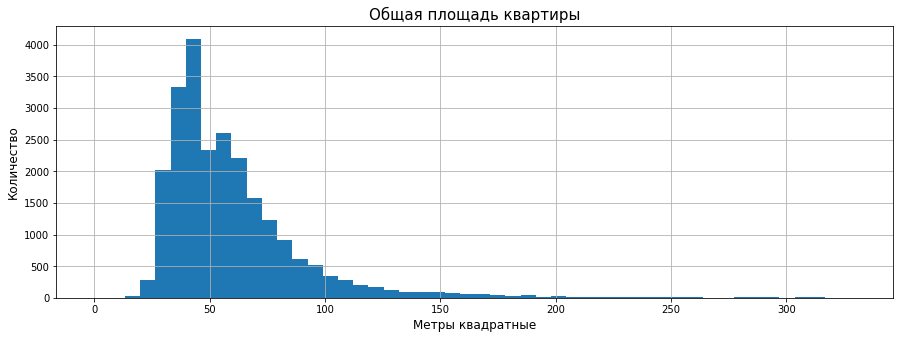

In [55]:
data.hist('total_area', bins=50, range=(0, 330), figsize=(15, 5))
plt.title('Общая площадь квартиры', size=15)
plt.xlabel('Метры квадратные', size=12)
plt.ylabel('Количество', size=12)
plt.show()

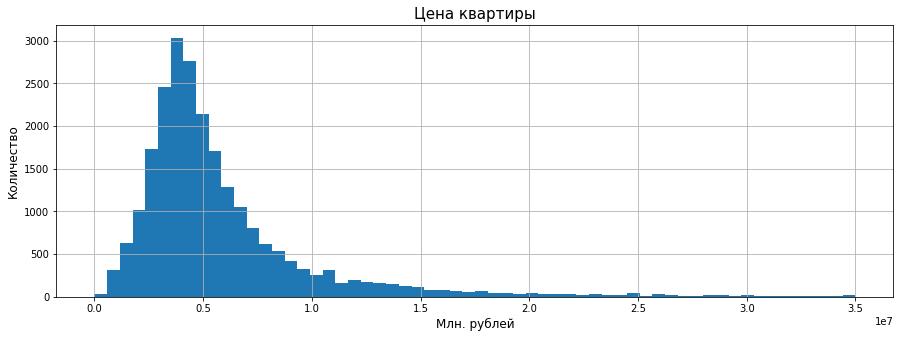

In [57]:
data.hist('last_price', bins=60, range=(0, 35000000), figsize=(15, 5))
plt.title('Цена квартиры', size=15)
plt.xlabel('Млн. рублей', size=12)
plt.ylabel('Количество', size=12)
plt.show()

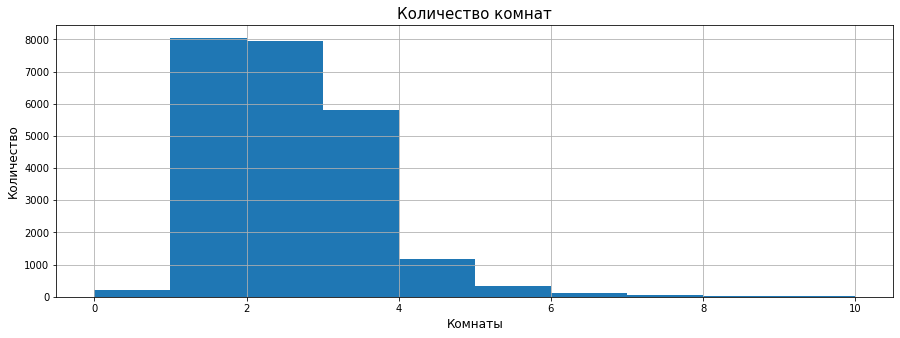

In [58]:
data.hist('rooms', bins=10, range=(0, 10), figsize=(15, 5))
plt.title('Количество комнат', size=15)
plt.xlabel('Комнаты', size=12)
plt.ylabel('Количество', size=12)
plt.show()

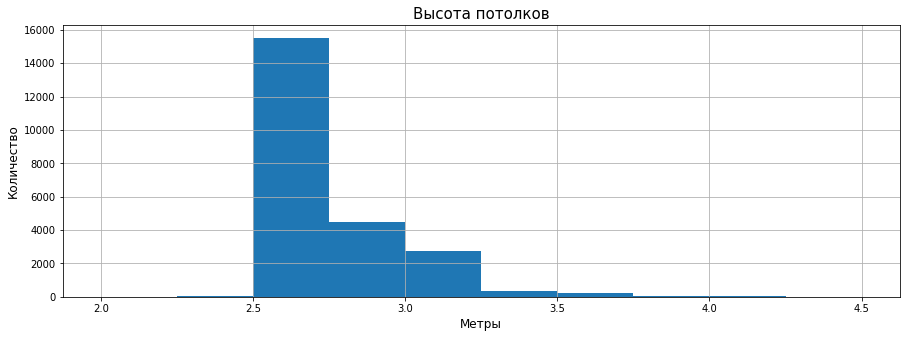

In [59]:
data.hist('ceiling_height', bins=10, range=(2, 4.5), figsize=(15, 5))
plt.title('Высота потолков', size=15)
plt.xlabel('Метры', size=12)
plt.ylabel('Количество', size=12)
plt.show()

### Вывод

По гистограммам видно, что больше всего объявлений с квартирами площадью от 30 до 45 квадратов, большая часть квартир имеет цену 4-5 млн, 1 или 2 комнаты и высоту 2,65 м.

<a id="step_4_2"></a>
#### * Время продажи квартиры.

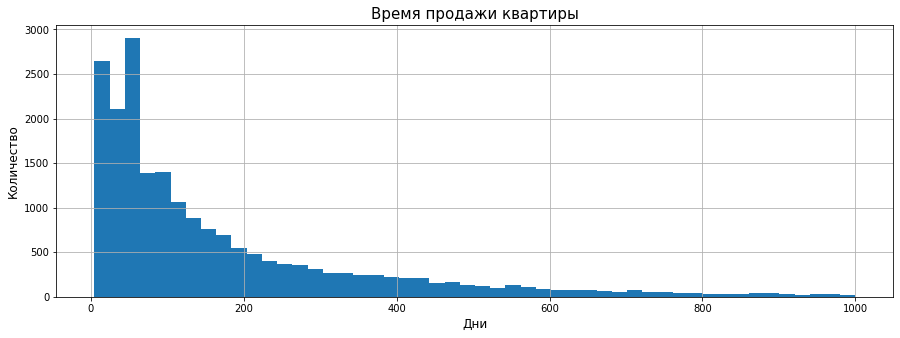

In [63]:
data.hist('days_exposition', bins=50, range=(5, 1000), figsize=(15, 5))
plt.title('Время продажи квартиры', size=15)
plt.xlabel('Дни', size=12)
plt.ylabel('Количество', size=12)
plt.show()

In [22]:
days_exposition_pivot = (data
    .query('days_exposition > 0')
    .pivot_table(index='rooms', values='days_exposition', aggfunc=['median', 'mean'])
    .astype(int)
)
days_exposition_pivot

,median,mean
,days_exposition,days_exposition
rooms,,
0,50,109
1,81,158
2,91,173
3,114,204
4,156,254
5,185,306
6,201,277
7,138,197


### Вывод

У квартир с разным количествои комнат, разное время продажи, чем меньше комнат, тем быстрее продажа.

Всреднем на продажу квартиры уходит 2-3 месяца ( 60-90 дней). Получается всё что до 60 дней является быстрой продажей, а всё что более 90 дней - долгой. 

Как видно на гисограме, большая часть квартир продаётся за 2-3 месяца. Если смотреть по медиане, то выделяются на этом фоне 15-ти и 10-ти комнатные квартиры, либо они были очень востребованы, либо впутаны в какие-то "дела".

<a id="step_4_3"></a>
#### * Редкие и выбивающиеся особености.

Проанализируем цену.

In [23]:
data.sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m,name_floor,kitchen_to_total,living_to_total,week,month,year
8793,7,12190,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,0,NaN,8.0,111,последний,0.371560,0.293578,12,3,2019
17456,7,430000,30.4,2019-04-22,1,2.70,2.0,16.0,1,False,...,0,NaN,NaN,14144,первый,0.197368,0.526316,17,4,2019
14911,5,430000,54.0,2018-06-26,2,2.80,3.0,0.0,3,False,...,0,NaN,44.0,7962,последний,0.000000,0.000000,26,6,2018
16274,18,440000,40.0,2018-07-10,1,2.55,5.0,0.0,1,False,...,0,NaN,45.0,11000,первый,0.000000,0.000000,28,7,2018
17676,0,450000,36.5,2018-02-01,1,2.55,5.0,17.3,4,False,...,0,NaN,120.0,12328,другой,0.232877,0.473973,5,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,20,300000000,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,2,198.0,111.0,485436,другой,0.113269,0.417476,51,12,2017
1436,19,330000000,190.0,2018-04-04,3,3.50,7.0,95.0,5,False,...,3,285.0,233.0,1736842,другой,0.210526,0.500000,14,4,2018
14706,15,401300000,401.0,2016-02-20,5,2.55,9.0,204.0,9,False,...,1,478.0,393.0,1000748,последний,0.059850,0.508728,7,2,2016
19540,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,2,318.0,106.0,466666,последний,0.124444,0.455222,49,12,2017


Уберем объявления, которые выделяются больше всего.

In [24]:
data_delet = data.query('30000000 >= last_price > 13000')

Предположим, что сумма жилой площади и кухни не может быть больше общей площади. Рассчитаем соотношение жилой и кухонной площади к общей, обычно они не должны быть более 90%, поэтому уберем значения, которые будут превышать данный порог.

In [25]:
data_delet['living_and_kitchen_to_total'] = data_delet['living_to_total'] + data_delet['kitchen_to_total']
data_new = data_delet.query('living_and_kitchen_to_total < 0.9')
data_new.sort_values(by='living_and_kitchen_to_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_m,name_floor,kitchen_to_total,living_to_total,week,month,year,living_and_kitchen_to_total
15401,6,4600000,76.0,2018-02-07,3,2.55,9.0,0.0,2,False,...,782.0,60.0,60526,другой,0.000000,0.000000,6,2,2018,0.0
18780,1,3650000,35.0,2018-05-05,1,2.70,17.0,0.0,2,False,...,NaN,116.0,104285,другой,0.000000,0.000000,18,5,2018,0.0
5475,11,3100000,56.5,2018-02-11,2,2.55,5.0,0.0,2,False,...,NaN,45.0,54867,другой,0.000000,0.000000,6,2,2018,0.0
10853,6,5500000,54.0,2016-07-04,3,2.65,12.0,0.0,5,False,...,NaN,57.0,101851,другой,0.000000,0.000000,27,7,2016,0.0
2102,4,2980000,56.0,2017-12-11,2,2.55,5.0,0.0,2,False,...,NaN,43.0,53214,другой,0.000000,0.000000,50,12,2017,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22146,4,950000,30.0,2018-01-17,1,2.55,5.0,18.0,1,False,...,NaN,45.0,31666,первый,0.300000,0.600000,3,1,2018,0.9
4383,24,5000000,30.0,2018-02-20,1,3.50,6.0,18.0,3,False,...,NaN,62.0,166666,другой,0.300000,0.600000,8,2,2018,0.9
22486,2,3850000,45.0,2017-07-04,2,2.55,9.0,34.0,3,False,...,41.0,192.0,85555,другой,0.144444,0.755556,27,7,2017,0.9
17654,8,4150000,50.0,2017-09-29,2,2.55,5.0,35.0,1,False,...,550.0,28.0,83000,первый,0.200000,0.700000,39,9,2017,0.9


In [26]:
do = data['total_area'].count()
posle = data_new['total_area'].count()
itog = posle / do
itog_raznica = do - posle
print('Процент данных оставшихся после удаления: {:.2%}'.format(itog))
print('Количество удаленных строк: {:.2f}'.format(itog_raznica))

Процент данных оставшихся после удаления: 96.69%
Количество удаленных строк: 784.00


<a id="step_4_4"></a>
#### * Факторы влияющие на стоимость квартиры.

Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: недели, месяца и года.

Зависимость цена от площади: 0.79


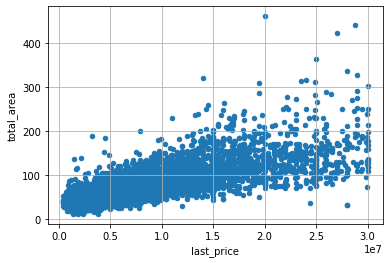

Зависимость цена от количества комнат: 0.52


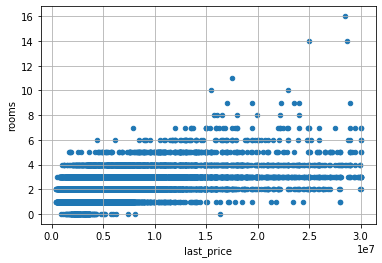

Зависимость цена от удаленности от центра: -0.35


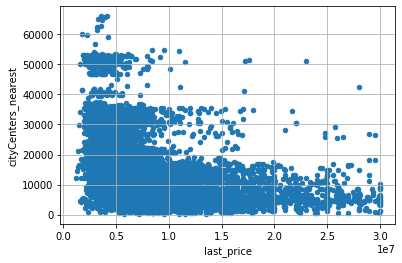

In [66]:
price_by_area = data_new['last_price'].corr(data_new['total_area'])
price_by_rooms = data_new['last_price'].corr(data_new['rooms'])
price_by_centers = data_new['last_price'].corr(data_new['cityCenters_nearest'])
print('Зависимость цена от площади: {:.2f}'.format(price_by_area))
data_new.plot(x='last_price', y='total_area', kind='scatter', grid=True)
plt.show()
print('Зависимость цена от количества комнат: {:.2f}'.format(price_by_rooms))
data_new.plot(x='last_price', y='rooms', kind='scatter', grid=True)
plt.show()
print('Зависимость цена от удаленности от центра: {:.2f}'.format(price_by_centers))
data_new.plot(x='last_price', y='cityCenters_nearest', kind='scatter', grid=True)
plt.show()

Самая большая корреляция наблюдается между ценой и площадью квартиры.

Рассмотрим как влияет неделя, месяц и год размещения на среднюю цену жилья.

In [81]:
data_week = data.pivot_table(index='week', values='price_per_m', aggfunc='mean').round()
data_week

,price_per_m
week,
1,97182.0
2,98058.0
3,96546.0
4,105362.0
5,97358.0
6,97269.0
7,100431.0
8,97087.0
9,101539.0


In [78]:
data_month = data.pivot_table(index='month', values='price_per_m', aggfunc='mean').round()
data_month

,price_per_m
month,
1,99862.0
2,98768.0
3,98973.0
4,101949.0
5,98543.0
6,97763.0
7,99625.0
8,100110.0
9,100464.0


In [80]:
data_year = data.pivot_table(index='year', values='price_per_m', aggfunc='mean').round()
data_year

,price_per_m
year,
2014,124830.0
2015,104614.0
2016,98322.0
2017,97621.0
2018,97773.0
2019,107123.0


Как видно, есть определенные недели, когда цена выше среднего занчения, а в последнюю неделю года почти на 50% больше.

Если рассматривать цену по месяцам, то самые "дорогие" месяцы, это апрель, август и сентябрь, а самые "дешевые" июнь и октябрь.

Рассматривая цену за период с 2014 по 2019, мы видим, что цена с 2014 до 2017 имеет тенденцию на спад, а в 2018 начала подниматься.

In [31]:
data_floor = data.groupby('name_floor')['price_per_m'].mean()
data_floor

name_floor
другой       103486.293305
первый        81983.111759
последний     93410.267686
Name: price_per_m, dtype: float64

Как видно, чем выше этаж, чем больше цена.

<a id="step_4_5"></a>
#### * Топ 10 населенных пунктов по количеству объявлений.

Теперь рассмотрим 10 населенных пунктов с наибольшим количествои объявлений.

С помощью `pivot_table` наёдем количество объявлений и среднюю цену за квадратный метр.

In [32]:
top10 = data_new.pivot_table(index='locality_name', values='price_per_m', aggfunc=['count', 'mean'])
top10.columns = ['count', 'mean']
top10.sort_values(by='count', ascending=False, inplace=True)
top10[:10]

,count,mean
locality_name,,
Санкт-Петербург,15098,110331.603921
посёлок Мурино,512,85507.363281
посёлок Шушары,436,78652.038991
Всеволожск,386,68433.888601
Пушкин,362,102905.397790
Колпино,333,75380.378378
посёлок Парголово,324,90049.324074
Гатчина,300,68693.570000
деревня Кудрово,294,92294.272109


Как видно, в Санкт-Петербурге больше всего объявлений, также как и цена за квадратный метр. Меньше всего объявлений в Выборге и цена за квадратный метр там тоже самая маленькая из топ 10 городов.

<a id="step_4_6"></a>
#### * Квартиры Санкт-Петербурга.

Выделим квартиры, которые продаются только в Санкт-Петербурге.

In [33]:
data_spb = data.query('locality_name == "Санкт-Петербург"') 
data_spb['cityCenters_nearest'] = data_spb['cityCenters_nearest'].fillna(0)
data_spb['km_to_centres'] = data_spb['cityCenters_nearest'] / 1000
data_spb['km_to_centres'] = data_spb['km_to_centres'].astype('int')

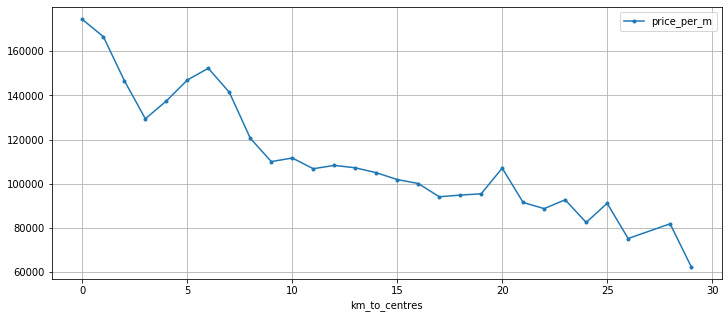

In [83]:
mean_price_to_km = data_spb.pivot_table(index='km_to_centres', values='price_per_m')
mean_price_to_km = mean_price_to_km.query('km_to_centres != 27') # в этом значение находится какое-то аномальное значение
mean_price_to_km.plot(style='.-', grid=True, figsize=(12, 5))

Как видно на графике, после 8 км начинается резкий рост цен на недвижимость, следовательно это и есть центр.

<a id="step_4_7"></a>
#### * Квартиры в центре Санкт-Петербурга.

выделим квартиры, которые находятся в зоне центра.

In [35]:
data_spb_centres = data_spb.query('km_to_centres < 8')
display(data_spb_centres)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_m,name_floor,kitchen_to_total,living_to_total,week,month,year,km_to_centres
3,0,64900000,159.00,2015-07-24,3,2.60,14.0,0.0,9,False,...,234.0,424.0,408176,другой,0.000000,0.000000,30,7,2015,6
24,8,6500000,97.20,2015-10-31,2,2.80,3.0,46.5,1,False,...,124.0,265.0,66872,первый,0.201646,0.478395,44,10,2015,2
35,6,15500000,149.00,2017-06-26,5,2.55,5.0,104.0,4,False,...,779.0,644.0,104026,другой,0.114094,0.697987,26,6,2017,3
51,7,45000000,161.00,2017-10-17,3,3.20,8.0,38.0,4,False,...,99.0,541.0,279503,другой,0.310559,0.236025,42,10,2017,6
52,20,11795000,136.00,2017-09-22,6,3.00,2.0,94.0,2,False,...,NaN,NaN,86727,последний,0.080882,0.691176,38,9,2017,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000,47.00,2016-05-20,1,3.00,6.0,18.2,1,False,...,519.0,131.0,90425,первый,0.310638,0.387234,20,5,2016,4
23681,13,5250000,43.00,2018-05-11,2,2.50,5.0,29.0,2,False,...,660.0,80.0,122093,другой,0.139535,0.674419,19,5,2018,7
23690,3,5500000,52.00,2018-07-19,2,2.55,5.0,31.0,2,False,...,NaN,15.0,105769,другой,0.115385,0.596154,29,7,2018,6
23691,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,806.0,519.0,129903,другой,0.145405,0.552812,41,10,2016,4


Построим гистограмы квартир в центре.

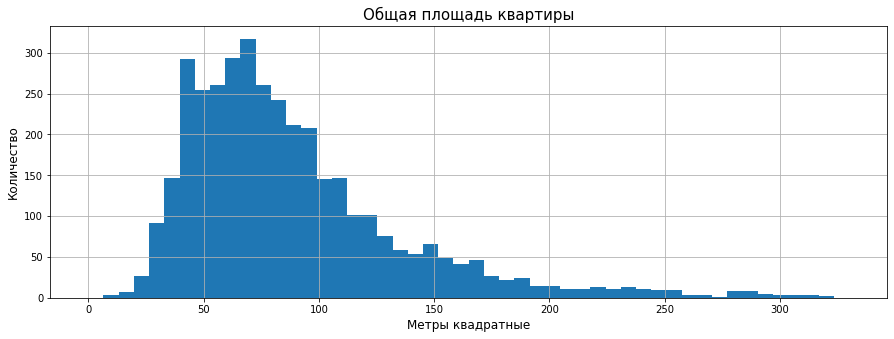

In [85]:
data_spb_centres.hist('total_area', bins=50, range=(0, 330), figsize=(15, 5))
plt.title('Общая площадь квартиры', size=15)
plt.xlabel('Метры квадратные', size=12)
plt.ylabel('Количество', size=12)
plt.show()

Как видно в центре Питера большего всего квартир площадью 45-70 метров, а по всем объявлениям 30-45 метров.

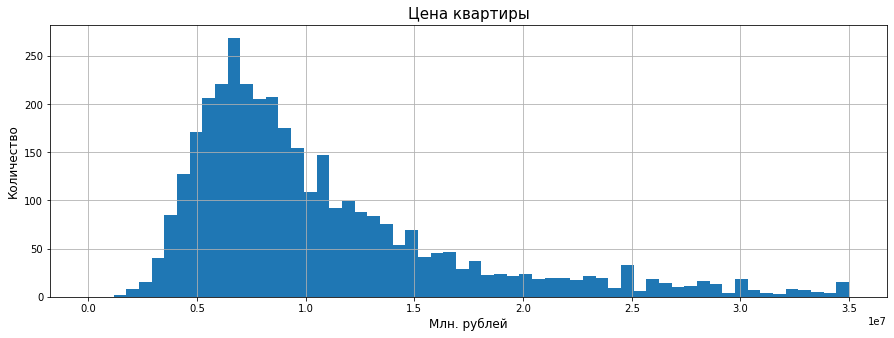

In [86]:
data_spb_centres.hist('last_price', bins=60, range=(0, 35000000), figsize=(15, 5))
plt.title('Цена квартиры', size=15)
plt.xlabel('Млн. рублей', size=12)
plt.ylabel('Количество', size=12)
plt.show()

Большая часть квартир имеет цену 6 млн. На 1-1,5 млн рублей больше, чем по всем объявлениям.

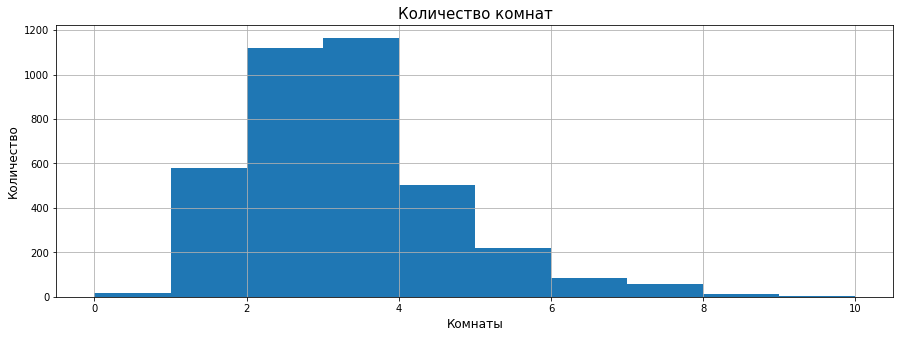

In [87]:
data_spb_centres.hist('rooms', bins=10, range=(0, 10), figsize=(15, 5))
plt.title('Количество комнат', size=15)
plt.xlabel('Комнаты', size=12)
plt.ylabel('Количество', size=12)
plt.show()

Количество комнат 2-3.

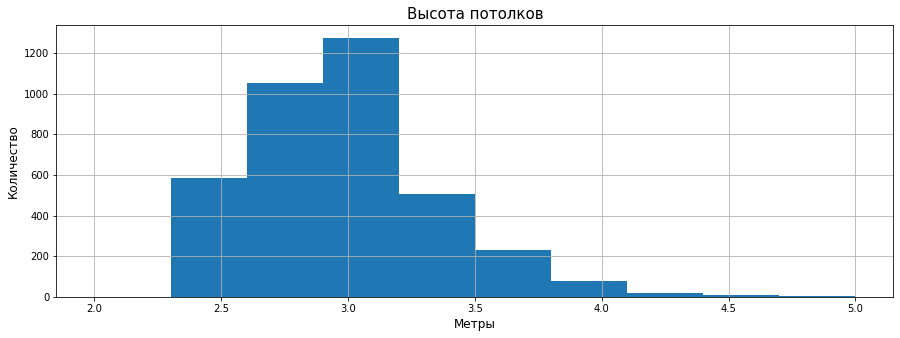

In [88]:
data_spb_centres.hist('ceiling_height', bins=10, range=(2, 5), figsize=(15, 5))
plt.title('Высота потолков', size=15)
plt.xlabel('Метры', size=12)
plt.ylabel('Количество', size=12)
plt.show()

Корреляция число комнат, этаж, удалённость от центра с ценой.

Зависимость цены от этажа: 0.12


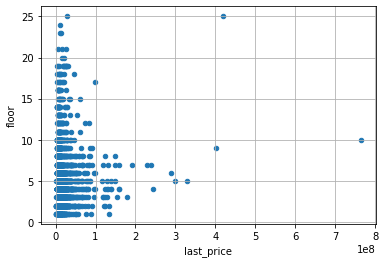

Зависимость цены от количества комнат: 0.34


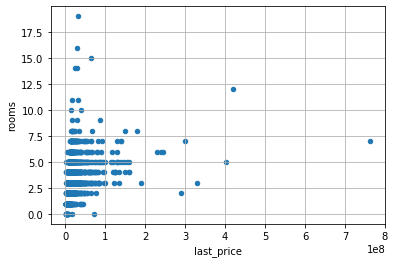

Зависимость цены от удаленности от центра: -0.05


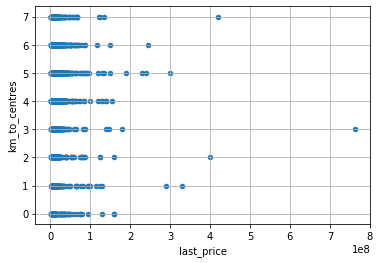

In [41]:
price_spb_by_floor = data_spb_centres['last_price'].corr(data_spb_centres['floor'])
price_spb_by_rooms = data_spb_centres['last_price'].corr(data_spb_centres['rooms'])
price_spb_by_centers = data_spb_centres['last_price'].corr(data_spb_centres['km_to_centres'])
print('Зависимость цены от этажа: {:.2f}'.format(price_spb_by_floor))
data_spb_centres.plot(x='last_price', y='floor', kind='scatter', grid=True)
plt.show()
print('Зависимость цены от количества комнат: {:.2f}'.format(price_spb_by_rooms))
data_spb_centres.plot(x='last_price', y='rooms', kind='scatter', grid=True)
plt.show()
print('Зависимость цены от удаленности от центра: {:.2f}'.format(price_spb_by_centers))
data_spb_centres.plot(x='last_price', y='km_to_centres', kind='scatter', grid=True)
plt.show()

Как видно в центре города на цену больше влияет количество комнат, чем этаж либо удаленность, либо время, когда было выставлено объявление.

In [89]:
data_spb_week = data_spb_centres.pivot_table(index='week', values='price_per_m', aggfunc='mean').round()
data_spb_week

,price_per_m
week,
1,161191.0
2,143075.0
3,141623.0
4,150120.0
5,134870.0
6,151284.0
7,148695.0
8,131172.0
9,147928.0


In [90]:
data_spb_month = data_spb_centres.pivot_table(index='month', values='price_per_m', aggfunc='mean').round()
data_spb_month

,price_per_m
month,
1,146832.0
2,144092.0
3,145204.0
4,153942.0
5,139053.0
6,144888.0
7,142501.0
8,145572.0
9,144385.0


In [92]:
data_spb_year = data_spb_centres.pivot_table(index='year', values='price_per_m', aggfunc='mean').round()
data_spb_year

,price_per_m
year,
2014,195654.0
2015,144723.0
2016,144970.0
2017,142979.0
2018,139907.0
2019,157916.0


В центре Питера "картина" по неделям схожа с общей.

По месяцам есть разница, только в апреле есть значителбный рост цен, а в мае и октябре наоборот просадка.

С годами тоже схожая ситуация, по сравнению с общими показателями по всем объявлениям.

In [45]:
data_spb_floor = data_spb_centres.groupby('name_floor')['price_per_m'].mean()
data_spb_floor

name_floor
другой       148002.257945
первый       122214.299270
последний    144561.318598
Name: price_per_m, dtype: float64

Первый этаж и здесь всё также не пользуется спросом, а вот с последним у другими немного поменялась ситуация, и самый дорогой квадрат тепеь не у последнего этажа.

### Вывод

В 4 шаге мы проанализировали информацию по квартирам, всё объявления и объявления в Санкт-Петербурге и его центре. Как видно, в центре города только дороже квадратный метр площади, а в остальном всё похоже.

<a id="step_5"></a>
### Шаг 5. Общий вывод.

Был рассмотрен рынок недвижимости города Санкт-Петербурга и его области.

Мы изучили полученную информацию, поняли какие имеются недочеты и как их можно исправить. Заполнили пропуски, там где это было уместно. Жилую площадь и кухонную площадь заполнили медианой по группе. Также сделали и с потолком.

Расчитали дополнительные данные для анализа.

Провели анализ по всем объявлениям и по центру Санкт-Петербурга. 

Мы выяснили:
- больше всего объявлений в Свнкт-Петербурге;
- в Санкт-Петербурге самая дорогая недвижимость из всех населенных пунктов;
- большая часть объявлений это 0-2 комнатные квартиры с площадью 30-45 квадратов;
- в центре Санкт-Петербурга находятся объявления с более дорогой недвижимостью, что логично. Такая недвижимость имеет большее количество комнат, большую площадь и соответсвенно цену;
- есть даты с более высокими ценами на жилье, хочешь продать дороже, тогда продавай в последнюю неделю года;
- за последний год жилье стало дороже;
- также есть пара вариантов квартир с очень подозрительными данными, за такой следует провести наблюдение.